# Background
- Vivendo is a fast food chain in Brazil with <b>over 200 outlets.</b>
- Customers <b>often claim compensation</b> from the company for <b>food poisoning.</b>
- The legal team processes these claims. The <b>legal team has offices in four locations.</b>
- The legal team wants to <b>improve how long it takes to reply to customers and close claims.</b>
- <b>The head of the legal department tment wants a report on how each location differs in the time it takes to close claims.</b>

# Tasks 
Submit your answers directly in the workspace provided.
1. <b> For every column in the data:</b>
- State whether the values match the description given in the table above.
- State the number of missing values in the column.
- Describe what you did to make values match the description if they did not match.

3. <b>Create a visualization that shows the number of claims in each location. Use the visualization to:</b>
- State which category of the variable location has the most observations
- Explain whether the observations are balanced across categories of the
variable location

3. <b>Describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.</b>
5. <b>Describe the relationship between time to close and location. Your answer must include a visualization to demonstrate the relationship.</b>

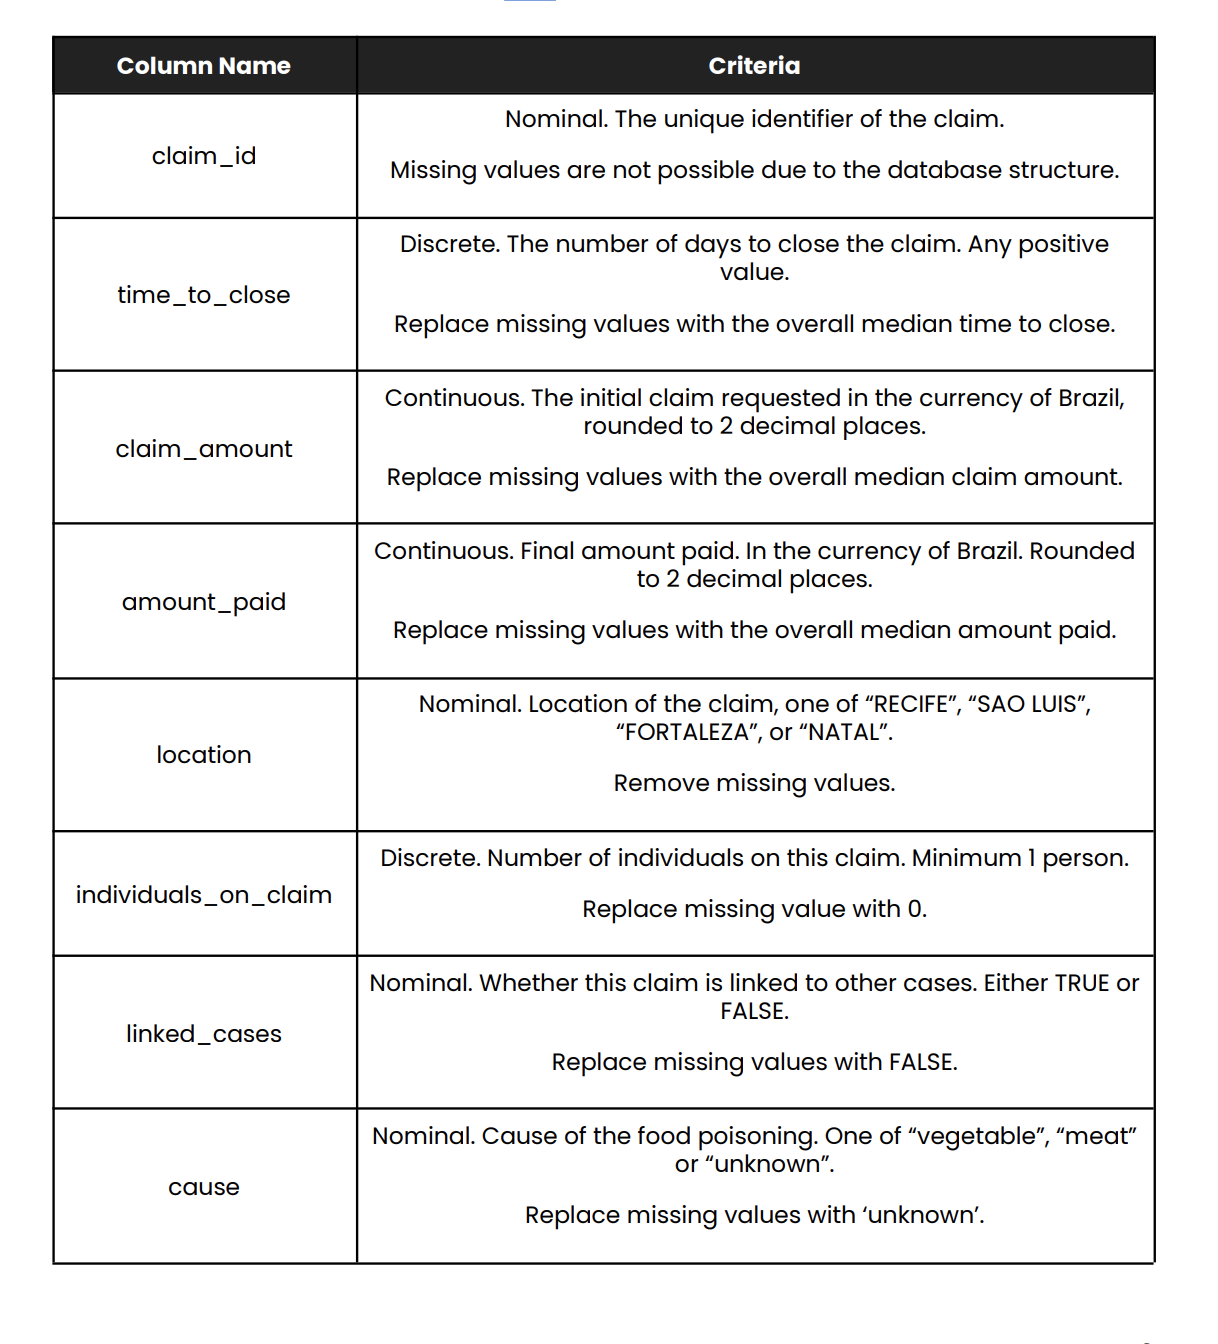

In [1]:
from IPython.display import Image
Image("table_description.jpg")

In [2]:
# Import data from csv to dataframe
import pandas as pd 
df = pd.DataFrame(pd.read_csv("food_claims_2212.csv"))
# Check the data 
print(df.head(5))

   claim_id  time_to_close claim_amount  amount_paid   location  \
0         1            317  R$ 74474.55     51231.37     RECIFE   
1         2            195  R$ 52137.83     42111.30  FORTALEZA   
2         3            183   R$ 24447.2     23986.30   SAO LUIS   
3         4            186  R$ 29006.28     27942.72  FORTALEZA   
4         5            138   R$ 19520.6     16251.06     RECIFE   

   individuals_on_claim linked_cases      cause  
0                    15        False    unknown  
1                    12         True    unknown  
2                    10         True       meat  
3                    11        False       meat  
4                    11        False  vegetable  


In [3]:
# state whether the value match the description in the table above 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


Answer : Based on data information above, there are 
1. claim_id desc : Nominal. The unique identifier of the claim.
            real: int64, no missing value    
2. time_to_close desc: Discrete. All positive. Missing value = overall median time to close
                 real: int64. no missing value 
3. claim_amount desc: Continuous object, should be float
5. amount_paid -- no currency, there's null value 
6. linked_cases -- there's null value
7. cause -- different type of object

   - location, cause

In [4]:
df.isna().sum()

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

1. <b> For every column in the data:</b>
- State whether the values match the description given in the table above.
- State the number of missing values in the column.
- Describe what you did to make values match the description if they did not match.

In [5]:
dfclean = df

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [7]:
# claim_id 
# check uniqueness, change type to nominal, no missing value 
import numpy as np 
dfclean=dfclean.astype({'claim_id':'object'})
df_claimid = dfclean[['claim_id']]
print(df_claimid['claim_id'].value_counts().sort_index(ascending=False)) # no duplicate value 
# time_to_close
# already matched with description 
print(dfclean.sort_values('time_to_close')) # all positive value 
# claim_amount 
# change into float64(continuous), 2 decimal place with Brazil currency
if dfclean['claim_amount'].dtype != 'float64':
    dfclean['claim_amount'] = dfclean['claim_amount'].map(lambda x: x.lstrip('R$'))
    dfclean = dfclean.astype({'claim_amount':'float64'})
# amount_paid 
# currency done, rounded to 2 decimal places done 
# replace missing values with the overall median amount paid 
dfclean['amount_paid'] = dfclean['amount_paid'].fillna(dfclean['amount_paid'].median())
# location 
# check uniqueness, no missing value 
print(dfclean['location'].unique()) #value match with description 
# individuals_on_claim 
# no missing value, discrete, need to check minimal value 
print(dfclean['individuals_on_claim'].min())
# linked_cases 
# nominal, check uniqueness, replace missing value with unknown 
dfclean['linked_cases'] = dfclean['linked_cases'].fillna(False)
dfclean['linked_cases'].unique()
# cause 
# nominal,check uniqueness, replace missing value with unknown 
dfclean['cause'] = dfclean['cause'].apply(str.lower).str.strip()
dfclean['cause'] =dfclean['cause'].replace('vegetables','vegetable')
dfclean['cause'].unique()


2000    1
1999    1
1998    1
1997    1
1996    1
       ..
5       1
4       1
3       1
2       1
1       1
Name: claim_id, Length: 2000, dtype: int64
     claim_id  time_to_close claim_amount  amount_paid   location  \
356       357             76   R$ 1637.94      1547.96  FORTALEZA   
1747     1748             82   R$ 2360.56      1649.88     RECIFE   
286       287             84   R$ 2113.92      2002.67     RECIFE   
1976     1977             84   R$ 2643.29      2642.09   SAO LUIS   
1297     1298             87   R$ 3166.94      2561.43     RECIFE   
...       ...            ...          ...          ...        ...   
546       547            419  R$ 74840.25     52478.30   SAO LUIS   
1341     1342            427  R$ 58013.28     39244.28     RECIFE   
469       470            453   R$ 68555.4     52255.96  FORTALEZA   
377       378            499     R$ 75253     51526.00   SAO LUIS   
826       827            518  R$ 72239.25     48493.80   SAO LUIS   

      individuals_

array(['unknown', 'meat', 'vegetable'], dtype=object)

In [8]:
pd.options.display.float_format = 'R$ {:.2f}'.format

In [9]:
dfclean.info()
dfclean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   object 
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   float64
 3   amount_paid           2000 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          2000 non-null   bool   
 7   cause                 2000 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 111.5+ KB


,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,R$ 51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,R$ 42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.20,R$ 23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,R$ 27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.60,R$ 16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,R$ 28982.30,R$ 24265.02,RECIFE,10,False,meat
1996,1997,166,R$ 5188.44,R$ 4772.77,FORTALEZA,2,True,meat
1997,1998,179,R$ 11975.85,R$ 10087.81,RECIFE,4,True,meat
1998,1999,162,R$ 23516.28,R$ 23310.24,RECIFE,9,False,meat


In [27]:
# convert the clean data to csv 
dfclean.to_csv("food_claims_2212_clean.csv")

Create a visualization that shows the number of claims in each location. Use the
visualization to:
1.  State which category of the variable location has the most observations
2.  Explain whether the observations are balanced across categories of the
variable location

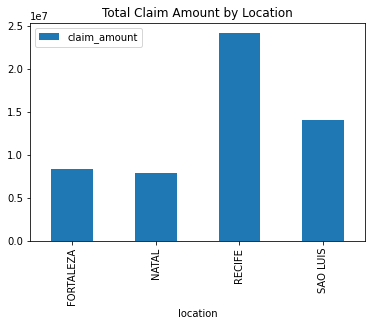

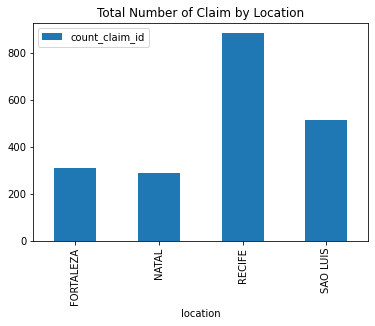

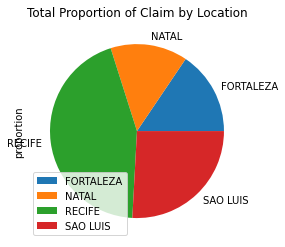

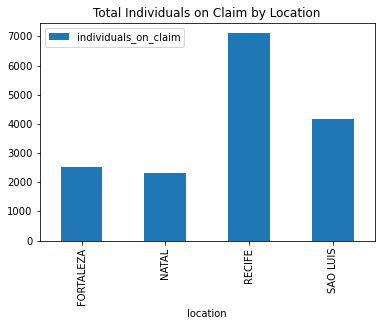

            claim_amount  count_claim_id  individuals_on_claim
location                                                      
FORTALEZA  R$ 8294581.01             311                  2508
NATAL      R$ 7914729.79             287                  2329
RECIFE    R$ 24116530.58             885                  7101
SAO LUIS  R$ 13988089.09             517                  4161


In [11]:
import matplotlib.pyplot as plt 
# location and number of claim 
dfclean['count_claim_id'] = 1
df_claim_per_location = dfclean.groupby('location')[['claim_amount','count_claim_id','individuals_on_claim']].agg(sum)
df_claim_per_location['proportion']=df_claim_per_location['count_claim_id']/df_claim_per_location['count_claim_id'].sum()
df_claim_per_location.plot(kind= 'bar', y='claim_amount',title='Total Claim Amount by Location')
df_claim_per_location.plot(kind= 'bar', y='count_claim_id', title = 'Total Number of Claim by Location')
df_claim_per_location.plot.pie(y='proportion', title = 'Total Proportion of Claim by Location')
df_claim_per_location.plot(kind= 'bar', y='individuals_on_claim', title = 'Total Individuals on Claim by Location')
plt.show()
print(df_claim_per_location[['claim_amount', 'count_claim_id','individuals_on_claim']])

Describe the distribution of time to close for all claims. Your answer must include a
visualization that shows the distribution.

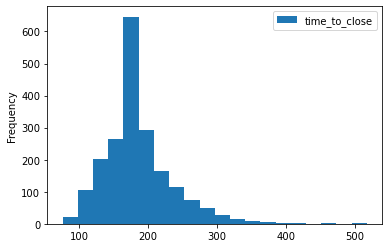

count   R$ 2000.00
mean     R$ 185.57
std       R$ 49.16
min       R$ 76.00
25%      R$ 158.00
50%      R$ 179.00
75%      R$ 204.00
max      R$ 518.00
Name: time_to_close, dtype: float64

In [12]:
dfclean.plot(kind='hist',y = 'time_to_close',bins=20)
plt.show()
dfclean['time_to_close'].describe()

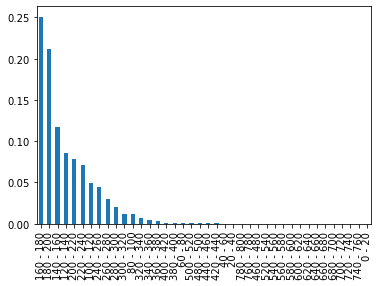

In [26]:
labels = ["{0} - {1}".format(i, i + 20) for i in range(0, 800, 20)]
dfclean['group']= pd.cut(dfclean.time_to_close, range(0, 820, 20), right=False, labels=labels)
new_df= dfclean['group'].value_counts(ascending=False,normalize=True)
new_df.plot(kind='bar')
plt.show()

Describe the relationship between time to close and location. Your answer must
include a visualization to demonstrate the relationship.

In [14]:
df_timetoclose_location = dfclean[['time_to_close','group','location']].set_index('location')
df_timetoclose_location['count_time_to_close_by_group']= df_timetoclose_location['time_to_close']

In [16]:
502+234+171+98+23+1

1029

In [23]:
411/2000

0.2055

In [29]:
# average time_to_close_ all 
time_to_close = dfclean['time_to_close'].describe()
time_to_close.astype('int')

count    2000
mean      185
std        49
min        76
25%       158
50%       179
75%       204
max       518
Name: time_to_close, dtype: int64